Import important libraries for our analysis

In [29]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np

**Task #1:** *Merge the 12 months of sales data into a single CSV file.*

In [63]:
all_data = pd.read_csv("C://Users//xrist//OneDrive//Υπολογιστής//Sales_Data_Csv//Sales_April_2019.csv")

files = [file for file in os.listdir('C://Users//xrist//OneDrive//Υπολογιστής//Sales_Data_Csv')]

all_months_data = pd.DataFrame()

for file in files:
    all_data = pd.read_csv('C://Users//xrist//OneDrive//Υπολογιστής//Sales_Data_Csv//' + file, on_bad_lines='skip')
    all_months_data = pd.concat([all_months_data, all_data])

Save the merged data

In [32]:
all_months_data.to_csv("all_data.csv", index = False)

In [33]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

Read in updated dataframe

In [90]:
df = pd.read_csv("all_data.csv")
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


Let's make a copy of df

In [142]:
df2 = df.copy()

**Data Cleaning Process**

> Replace the space between columns names with "-".

In [96]:
df.columns = df.columns.str.replace(' ', '_')

>Due to the merge of data we also pass the columns names to data

In [163]:
df = df.replace('Order ID', np.NaN)
df = df.replace('Product', np.NaN)
df = df.replace('Quantity Ordered', np.NaN)
df = df.replace('Price Each', np.NaN)
df = df.replace('Order Date', np.NaN)
df = df.replace('Purchase Address', np.NaN)
df = df.replace('Or', np.NaN)

> Drop the columns where all their values are *NULL*

In [165]:
df.dropna(how = 'all', inplace = True)

> We split the column *Purchase_Address* into three columns *Address, City, PostCode*.

In [202]:
df[['Address', 'City', 'PostCode']] = df['Purchase_Address'].str.split(',', expand = True)

> Add a Month Column

In [ ]:
df['Month'] = df['Order_Date'].str[0:2]

> Add a *Total* column that contains *Price_Each* column multiple with *Quantity_Ordered* column.

In [175]:
df['Total'] = df['Price_Each'] * df['Quantity_Ordered']

##### **Question #1** ######################

**Question #1.1:** *What was the best month of sales? How much was earned this month?*

> Convert the column *Price_Each* to float

In [168]:
df['Price_Each'] = pd.to_numeric(df['Price_Each'])

> Convert the column *Quantity_Ordered* to int

In [174]:
df['Quantity_Ordered'] = df['Quantity_Ordered'].astype(int)

In [169]:
df_grouped_month = df.groupby('Month')

In [178]:
sales_month = df_grouped_month['Total'].apply(lambda x : x.sum())

In [184]:
sales_month

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total, dtype: float64

*Visualization*

Text(0.5, 1.0, 'Month Sales')

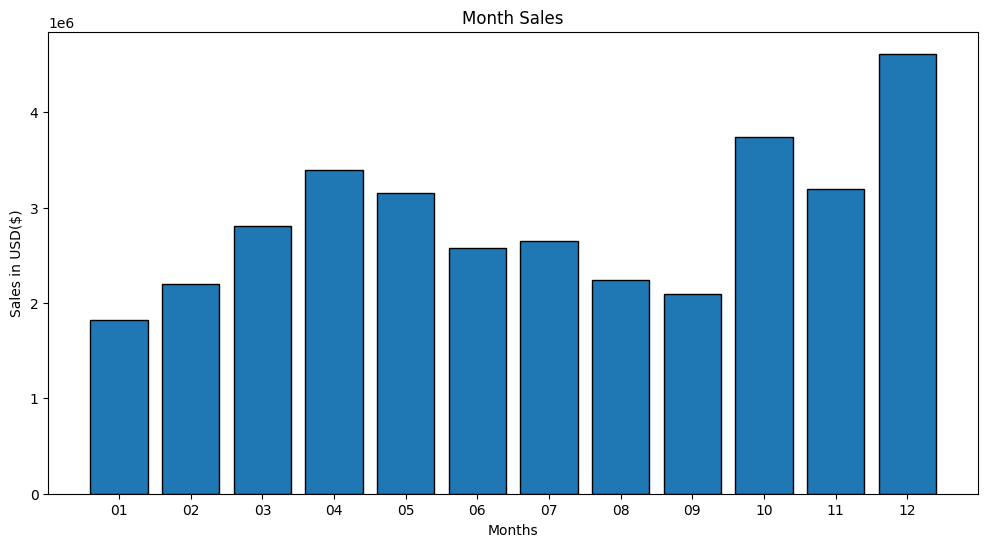

In [196]:
plt.figure(figsize = (12, 6))
plt.bar(sales_month.index, sales_month, edgecolor = 'black')
plt.xlabel('Months')
plt.ylabel('Sales in USD($)')
plt.title('Month Sales')

**TODO**: Summer Sales VS Winter Sales

**Answer #1:** The best month of sales was *December* with the total of **4,613,443.34 $**.

$$
~
$$

##### **Question #2** #####

**Question #2.1:** *What city sold the most product?*


   **Question #2.2:** *What city had the highest number of sales?*

In [212]:
city_grouped = df.groupby(by = 'City').sum()
city_grouped

C:\Users\xrist\AppData\Local\Temp\ipykernel_3916\4266229472.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_grouped = df.groupby(by = 'City').sum()


,Quantity_Ordered,Price_Each,Total
City,,,
Atlanta,16602,2779908.20,2795498.58
Austin,11153,1809873.61,1819581.75
Boston,22528,3637409.77,3661642.01
Dallas,16730,2752627.82,2767975.40
Los Angeles,33289,5421435.23,5452570.80
New York City,27932,4635370.83,4664317.43
Portland,14053,2307747.47,2320490.61
San Francisco,50239,8211461.74,8262203.91
Seattle,16553,2733296.01,2747755.48


*Visualization*

Text(0.5, 1.0, 'Sales per City')

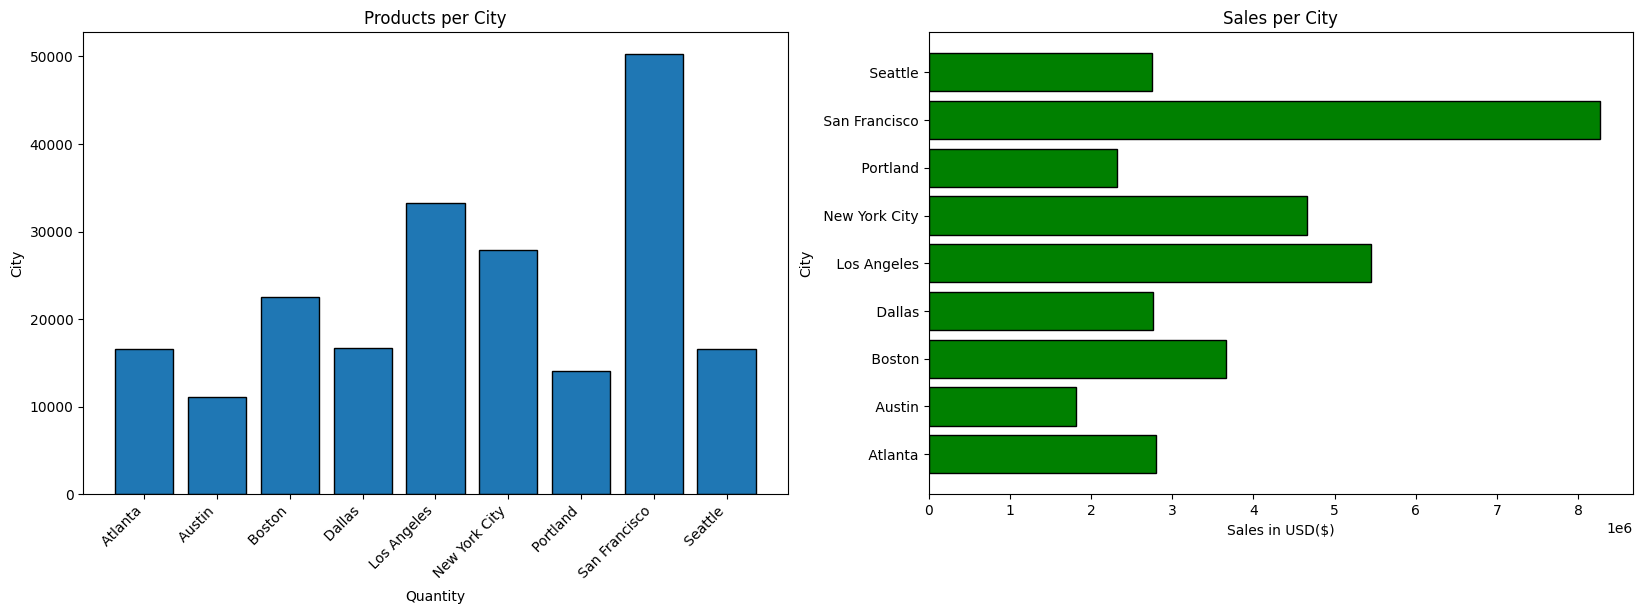

In [227]:
fig = plt.figure(figsize = (20,6))

plt.subplot(121)

plt.bar(city_grouped.index, city_grouped['Quantity_Ordered'], edgecolor = 'black')
plt.xlabel('Quantity')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('City')
plt.title('Products per City')

plt.subplot(122)

plt.barh(city_grouped.index, city_grouped['Total'], edgecolor = 'black', color = 'green')
plt.xlabel('Sales in USD($)')
plt.ylabel('City')
plt.title('Sales per City')

**Answer #2.1:** The city that sold the most product was *San Francisco* with the amount of **50239**.

**Answer #2.2:** The city that had the most sales was *San Francisco* with the total of **8262203.91 $**.

$$
~
$$

##### **Question #3** #####

In [217]:
df.head(10)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total,Address,City,PostCode
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,333 8th St,Los Angeles,CA 90001
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04,11.95,381 Wilson St,San Francisco,CA 94016
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04,99.99,668 Center St,Seattle,WA 98101
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04,11.95,790 Ridge St,Atlanta,GA 30301
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04,1700.00,915 Willow St,San Francisco,CA 94016
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04,11.99,83 7th St,Boston,MA 02215
